# Make some pretty plots for presentation purposes 

In [180]:
import straxen
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
#See this for documentation on creating graphs
#https://networkx.github.io/documentation/stable/auto_examples/index.html

### Get PMT information (XENON1T)

In [2]:
pmts = straxen.common.pmt_positions(True)

In [3]:
pmts

,x,y,i,array
0,-12.345668,46.074662,0,top
1,-4.157329,47.518487,1,top
2,4.157329,47.518487,2,top
3,12.345668,46.074662,3,top
4,20.158891,43.230881,4,top
...,...,...,...,...
243,1.125779,-44.527886,243,bottom
244,8.516815,-41.466418,244,bottom
245,15.907852,-38.404951,245,bottom
246,23.298888,-35.343484,246,bottom


In [9]:
pmts_x=pmts['x'][pmts['array']=='top'].values
pmts_y=pmts['y'][pmts['array']=='top'].values
pmt_n=pmts['i'][pmts['array']=='top'].values

In [7]:
pmts_x

array([-1.23456685e+01, -4.15732893e+00,  4.15732893e+00,  1.23456685e+01,
        2.01588911e+01,  2.73595960e+01,  3.37289935e+01,  3.90735525e+01,
        4.32308814e+01,  4.60746619e+01,  4.75184871e+01,  4.75184871e+01,
        4.60746619e+01,  4.32308814e+01,  3.90735525e+01,  3.37289935e+01,
        2.73595960e+01,  2.01588911e+01,  1.23456685e+01,  4.15732893e+00,
       -4.15732893e+00, -1.23456685e+01, -2.01588911e+01, -2.73595960e+01,
       -3.37289935e+01, -3.90735525e+01, -4.32308814e+01, -4.60746619e+01,
       -4.75184871e+01, -4.75184871e+01, -4.60746619e+01, -4.32308814e+01,
       -3.90735525e+01, -3.37289935e+01, -2.73595960e+01, -2.01588911e+01,
       -1.02880570e+01, -2.08035426e+00,  6.21826999e+00,  1.42451260e+01,
        2.16494016e+01,  2.81074946e+01,  3.33371551e+01,  3.71098220e+01,
        3.92606115e+01,  3.96955240e+01,  3.83955516e+01,  3.54175093e+01,
        3.08915520e+01,  2.50154855e+01,  1.80461224e+01,  1.02880570e+01,
        2.08035426e+00, -

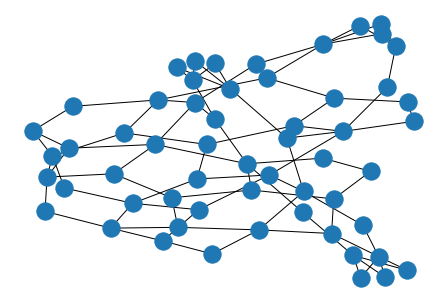

In [11]:
G = nx.path_graph(y)
nx.draw(G)
plt.show()

### Need to definded the graph structure as the pmt positions 
### This can be done by creating an adjacency
In graph theory and computer science, an adjacency list is a collection of unordered lists used to represent a finite graph
### Using the distance between each pmt


In [14]:
from sklearn.metrics.pairwise import euclidean_distances

In [18]:
pmts_pos = np.vstack((pmts_x, pmts_y)).T
pmt_distances = euclidean_distances(pmts_pos)

In [19]:
pmt_distances

array([[ 0.        ,  8.31465786, 16.56603615, ..., 52.13163627,
        44.26372668, 47.7       ],
       [ 8.31465786,  0.        ,  8.31465786, ..., 53.16015337,
        45.59708502, 47.7       ],
       [16.56603615,  8.31465786,  0.        , ..., 54.03224581,
        46.97651022, 47.7       ],
       ...,
       [52.13163627, 53.16015337, 54.03224581, ...,  0.        ,
         7.95      ,  7.95      ],
       [44.26372668, 45.59708502, 46.97651022, ...,  7.95      ,
         0.        ,  7.95      ],
       [47.7       , 47.7       , 47.7       , ...,  7.95      ,
         7.95      ,  0.        ]])

In [168]:
node_color=range(24)
options = {
    'node_color': 'k',
    'width': 0,   ## Do no draw lines (lines connecting nodes)
    'with_labels': True,
    'node_size':1000,
    #'node_color':range(127),
    #'cmap':plt.cm.Blues
    #'font_color':'w'
}

In [162]:
G = nx.from_numpy_matrix(pmt_distances)

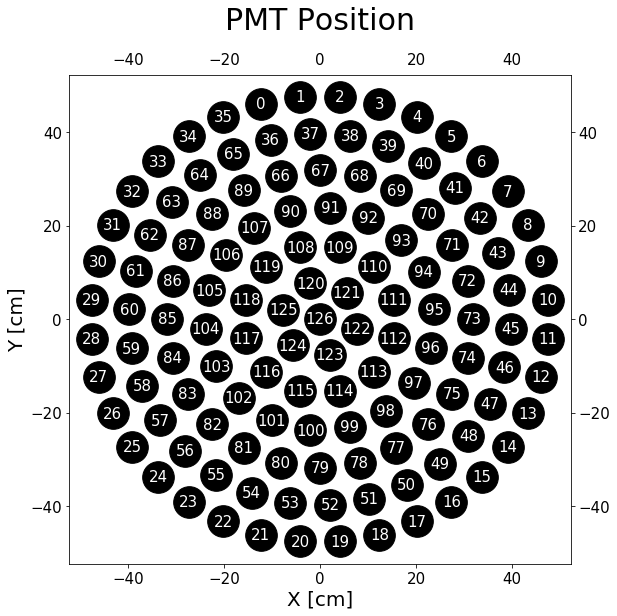

In [167]:
fig = plt.figure(figsize=(9,9))
ax= fig.subplots()
nx.draw_networkx(G, pos=pmts_pos, ax=ax, **options)
nx.draw_networkx_labels(G, pmts_pos, ax=ax, font_size=15,font_color='w' )
ax.set_ylabel('Y [cm]',fontsize=20)
ax.set_xlabel('X [cm]',fontsize=20)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.set_title('PMT Position',fontsize=30,y=1.08)
limits=plt.axis('on')
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True, right=True, labeltop=True,labelright=True)
fig.savefig('/home/ahiguera-mx/plots/pmt_graph_1t.pdf')

In [169]:
from scipy.spatial import Delaunay

### Use Delaunay triangulation from scipy, this was chosen for being well connected without being definitely overconnected.

In [170]:
tri_delaunay = Delaunay(pmts_pos)

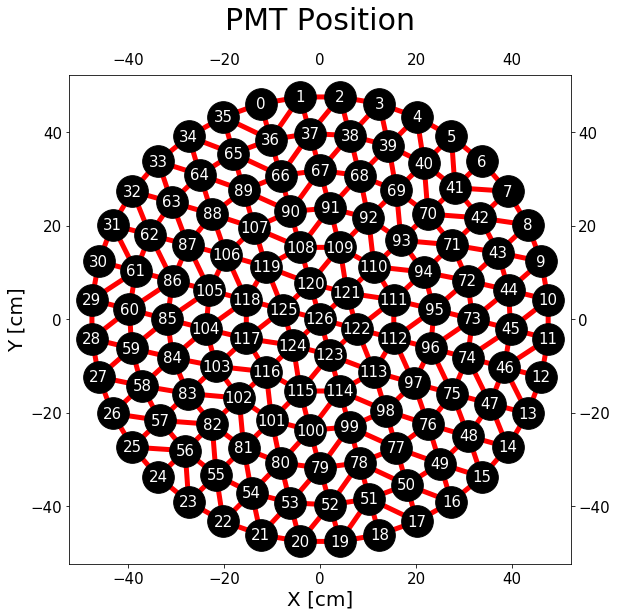

In [179]:
fig = plt.figure(figsize=(9,9))
ax= fig.subplots()
nx.draw_networkx(G, pos=pmts_pos, ax=ax, **options)
nx.draw_networkx_labels(G, pmts_pos, ax=ax, font_size=15,font_color='w' )
ax.set_ylabel('Y [cm]',fontsize=20)
ax.set_xlabel('X [cm]',fontsize=20)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.set_title('PMT Position',fontsize=30,y=1.08)
limits=plt.axis('on')
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True, right=True, labeltop=True,labelright=True)
plt.triplot(pmts_pos[:,0], pmts_pos[:,1], tri_delaunay.simplices,linewidth=5,color='r')
fig.savefig('/home/ahiguera-mx/plots/pmt_graph_1t_v2.pdf')

### Add dead pmts 

In [189]:
dead_pmts = np.array([1, 2, 12, 26, 34, 62, 65, 79, 86, 88, 102, 118, 27, 73, 91])

In [225]:
## this is from DIDACTS notebook
myfilter = ~np.isin(np.arange(pmts_pos.shape[0]), 
                    dead_pmts)
w_dead_pmts = pmts_pos[myfilter]
threshold=11  ## Space between pmts is 15 cm
distances_w_dead_pmts = euclidean_distances(w_dead_pmts)
distances_w_dead_pmts[distances_w_dead_pmts > threshold] = 0
if not True:
    distances_w_dead_pmts = distances_w_dead_pmts != 0
        
        
G2 = nx.from_numpy_matrix(distances_w_dead_pmts)

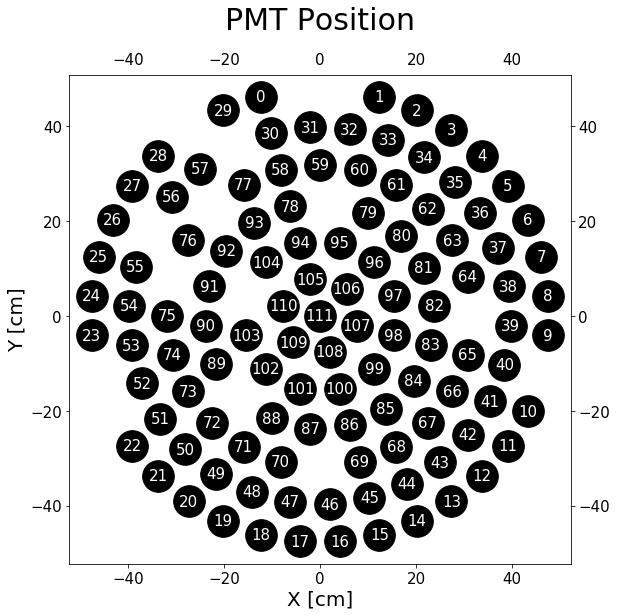

In [217]:
fig = plt.figure(figsize=(9,9))
ax= fig.subplots()
nx.draw_networkx(G2, pos=w_dead_pmts, ax=ax, **options)
nx.draw_networkx_labels(G2, w_dead_pmts, ax=ax, font_size=15,font_color='w' )
ax.set_ylabel('Y [cm]',fontsize=20)
ax.set_xlabel('X [cm]',fontsize=20)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.set_title('PMT Position',fontsize=30,y=1.08)
limits=plt.axis('on')
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True, right=True, labeltop=True,labelright=True)
#plt.triplot(pmts_pos[:,0], pmts_pos[:,1], tri_delaunay.simplices,linewidth=5,color='r')
fig.savefig('/home/ahiguera-mx/plots/pmt_graph_1t_w_dead_PMTS.pdf')

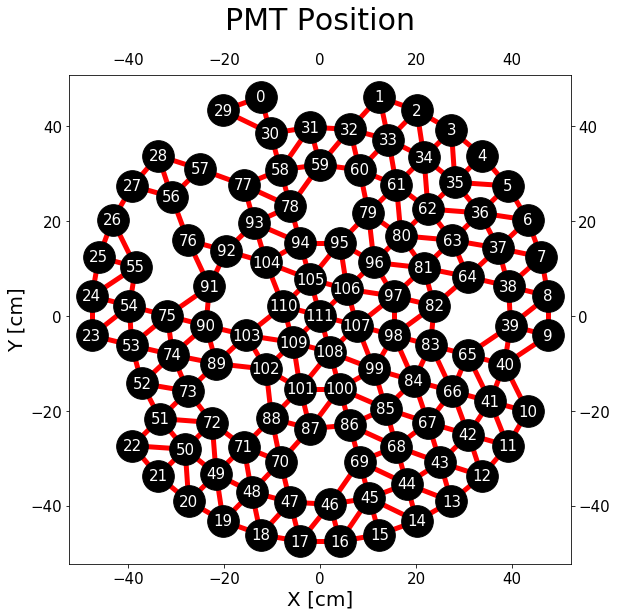

In [224]:
options2 = {
    'node_color': 'k',
    'width': 5,   ## Do no draw lines (lines connecting nodes)
    'with_labels': True,
    'node_size':1000,
    'edge_color':'r'
    #'node_color':range(127),
    #'cmap':plt.cm.Blues
    #'font_color':'w'
}

fig = plt.figure(figsize=(9,9))
ax= fig.subplots()
nx.draw_networkx(G2, pos=w_dead_pmts, ax=ax, **options2)
nx.draw_networkx_labels(G2, w_dead_pmts, ax=ax, font_size=15,font_color='w' )
ax.set_ylabel('Y [cm]',fontsize=20)
ax.set_xlabel('X [cm]',fontsize=20)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.set_title('PMT Position',fontsize=30,y=1.08)
limits=plt.axis('on')
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True, right=True, labeltop=True,labelright=True)

fig.savefig('/home/ahiguera-mx/plots/pmt_graph_1t_w_dead_PMTs_v2.pdf')